<a href="https://colab.research.google.com/github/sksonu0600/EDA-/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Airbnb NYC 2019.csv to Airbnb NYC 2019.csv
User uploaded file "Airbnb NYC 2019.csv" with length 7077973 bytes


In [ ]:
import pandas as pd

In [ ]:
airbnb=pd.read_csv('Airbnb NYC 2019.csv')

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
airbnb.shape

(48895, 16)

In [ ]:
airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Since there are many null values in last_review and reviews_per_month, we will leave last_review as it is and replace 0 with nan values in reviews_per_month

In [ ]:
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].replace(np.nan, 0)

In [ ]:
airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Dropping last_review column for null values

airbnb.drop(['last_review'],axis =1, inplace= True)

In [ ]:
#Dropping unneccessary columns

#airbnb.drop(['id', 'name', 'host_id', 'host_name'],axis =1, inplace= True)

In [ ]:
airbnb.describe(exclude='object')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
airbnb.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
# Removing null values

airbnb.dropna(inplace=True)

In [ ]:
# Understanding top hosts and thier neighbourhood pricewise

list_top10 = airbnb.groupby(['host_id','host_name','neighbourhood','neighbourhood_group','price']).size().reset_index(name='id').sort_values(by=['price'],ascending=False)
list_top10.head(10)

,host_id,host_name,neighbourhood,neighbourhood_group,price,id
9129,5143901,Erin,Greenpoint,Brooklyn,10000,1
31656,72390391,Jelena,Upper West Side,Manhattan,10000,1
19252,20582832,Kathrine,Astoria,Queens,10000,1
3036,1235070,Olson,East Harlem,Manhattan,9999,1
7565,3906464,Amy,Lower East Side,Manhattan,9999,1
8329,4382127,Matt,Lower East Side,Manhattan,9999,1
18176,18128455,Rum,Tribeca,Manhattan,8500,1
2928,1177497,Jessica,Clinton Hill,Brooklyn,8000,1
38481,156158778,Sally,Upper East Side,Manhattan,7703,1
11388,7407743,Jack,Battery Park City,Manhattan,7500,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,20))


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

Correlation Matrix

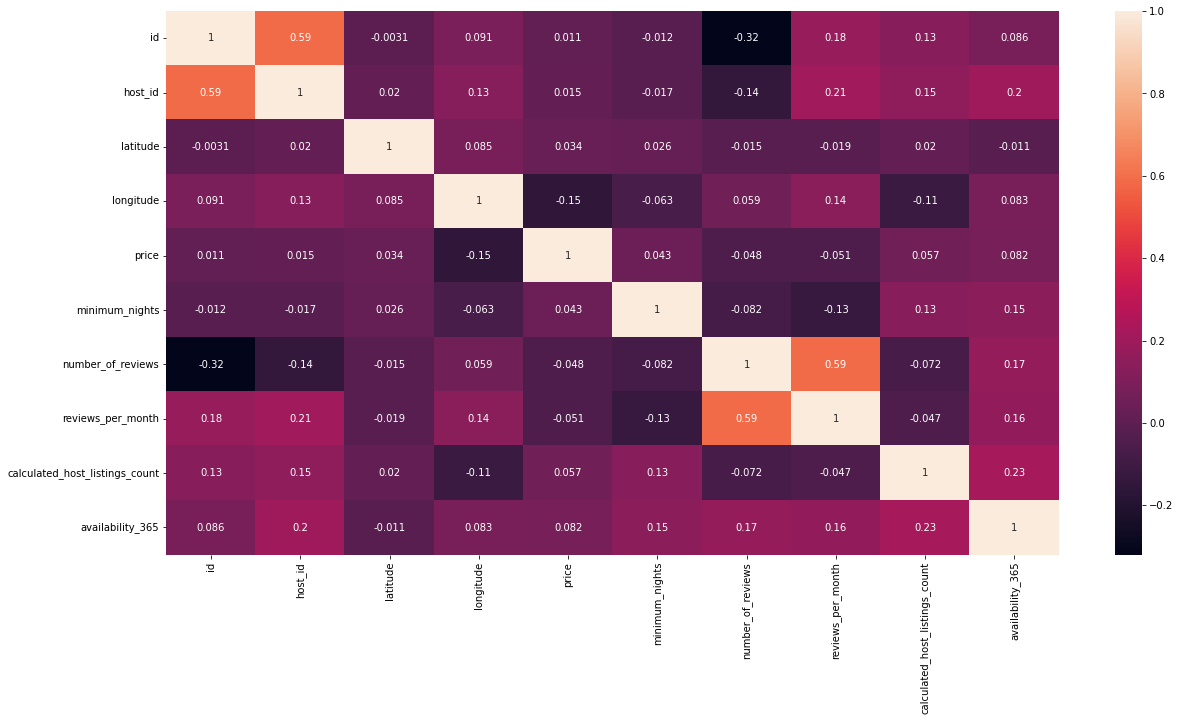

In [ ]:
corr = airbnb.corr()
plt.figure(figsize=(20,10))

sns.heatmap(corr,annot = True)


In [ ]:
#Finding unique values

print(airbnb['room_type'].unique())
print(airbnb['neighbourhood_group'].unique())

['Private room' 'Entire home/apt' 'Shared room']
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


VISUALUZATION

Text(0.5, 1.0, 'ROOM TYPE')

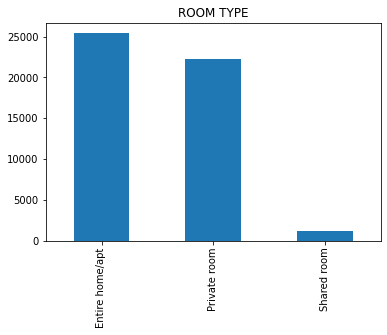

In [ ]:
airbnb['room_type'].value_counts().plot(kind='bar')
plt.title('ROOM TYPE')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


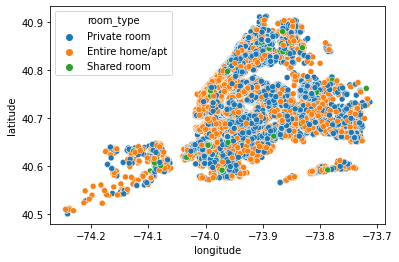

In [ ]:
#Room type distribution
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)

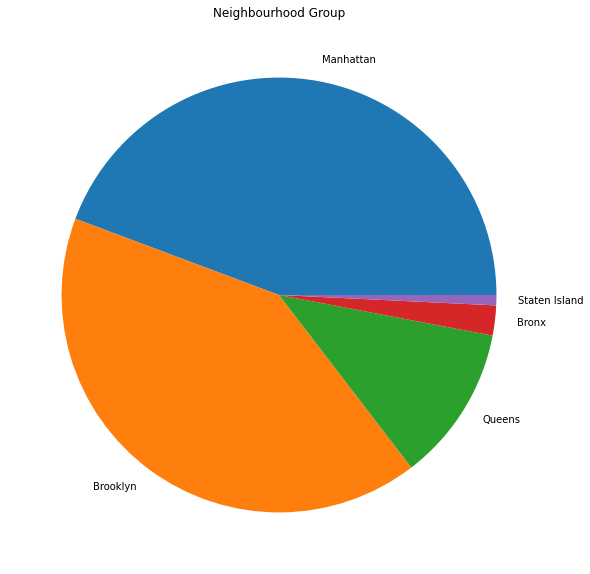

In [ ]:
plt.figure(figsize=(10,10))
g = plt.pie(airbnb.neighbourhood_group.value_counts(), labels=airbnb.neighbourhood_group.value_counts().index)
plt.title("Neighbourhood Group")
plt.show()

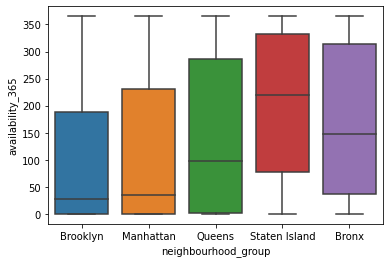

In [ ]:
#Exploring neighbourhood and availability of room

ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


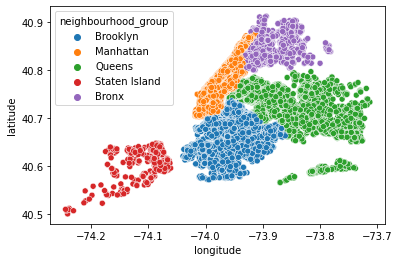

In [ ]:
#Understanding neighbourhood

sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)

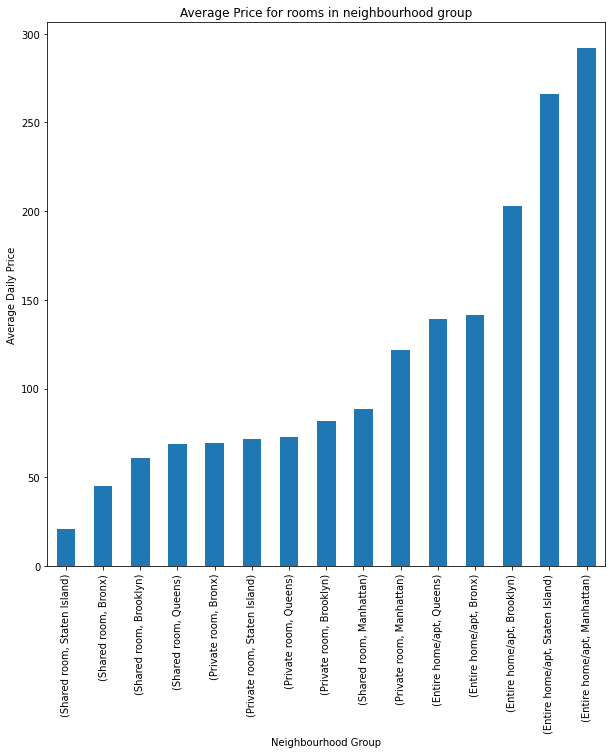

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.944196
                Staten Island        266.205128
                Manhattan            291.840807
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.487346
                Brooklyn              81.731334
                Manhattan            121.497409
Shared room     Staten Island         21.000000
                Bronx                 44.818182
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [ ]:
#knowing about price

airbnb.head()
plt.figure(figsize=(10,10))
df = airbnb[airbnb['minimum_nights']==1]
 

Top 20 most expensive locality in Airbnb listing are :


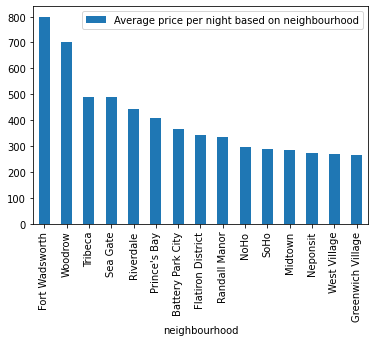

,Average price per night based on neighbourhood
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
Prince's Bay,409.500000
Battery Park City,367.086957
Flatiron District,341.925000
Randall Manor,336.000000


In [ ]:
#Most expensive neighbourhood

print('Top 20 most expensive locality in Airbnb listing are :')
df4 = airbnb.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)


Top 20 Least expensive locality in Airbnb listing are :


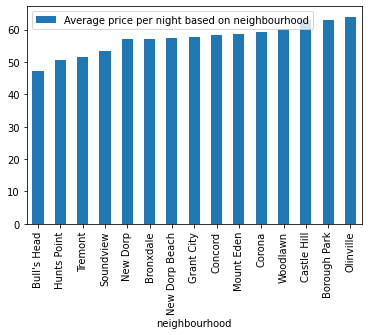

,Average price per night based on neighbourhood
neighbourhood,
Bull's Head,47.333333
Hunts Point,50.500000
Tremont,51.545455
Soundview,53.466667
New Dorp,57.000000
Bronxdale,57.105263
New Dorp Beach,57.400000
Grant City,57.666667
Concord,58.192308


In [ ]:
#Least expensive

print('Top 20 Least expensive locality in Airbnb listing are :')
df4 = airbnb.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=True).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)


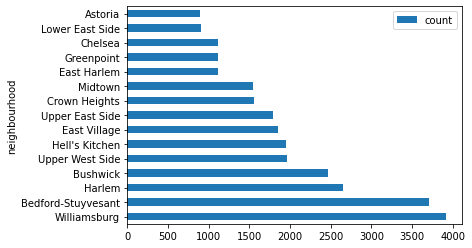

,count
neighbourhood,
Williamsburg,3917
Bedford-Stuyvesant,3713
Harlem,2655
Bushwick,2462
Upper West Side,1969
Hell's Kitchen,1954
East Village,1852
Upper East Side,1797
Crown Heights,1563


In [ ]:
#Majority of locality listed

df5 = airbnb.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})


df5.head(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.head(15))

Least Listing number of count


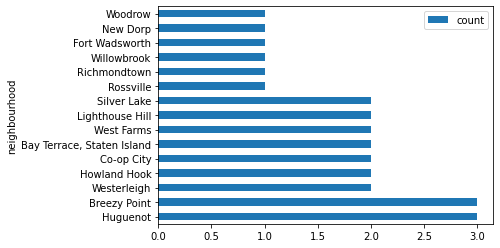

,count
neighbourhood,
Huguenot,3
Breezy Point,3
Westerleigh,2
Howland Hook,2
Co-op City,2
"Bay Terrace, Staten Island",2
West Farms,2
Lighthouse Hill,2
Silver Lake,2


In [ ]:
#Least listings

print('Least Listing number of count')
df5 = airbnb.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.tail(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.tail(15))

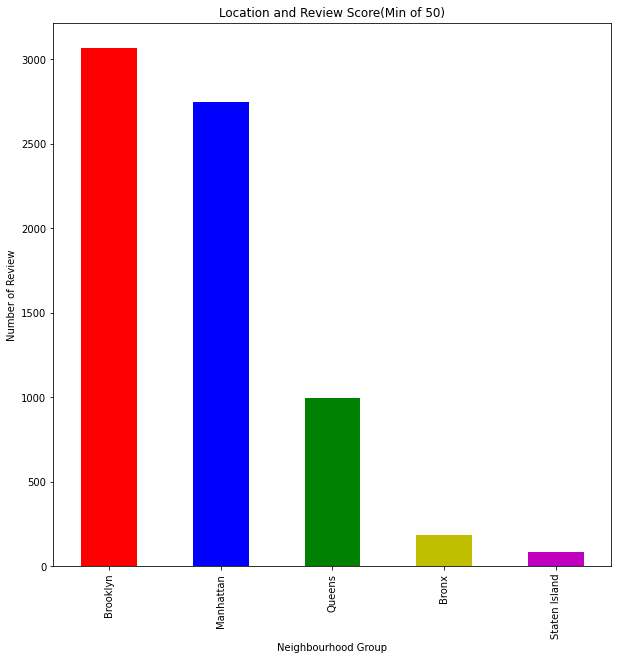

 Count of Review v/s neighbourhood group


,neighbourhood_group
Brooklyn,3063
Manhattan,2747
Queens,997
Bronx,187
Staten Island,81


In [ ]:
#Location and reviews

fig = plt.figure(figsize=(10,10))
review_50 = airbnb[airbnb['number_of_reviews']>=50]
df2 = review_50['neighbourhood_group'].value_counts()
df2.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood Group')
plt.show()
print(' Count of Review v/s neighbourhood group')
pd.DataFrame(df2)

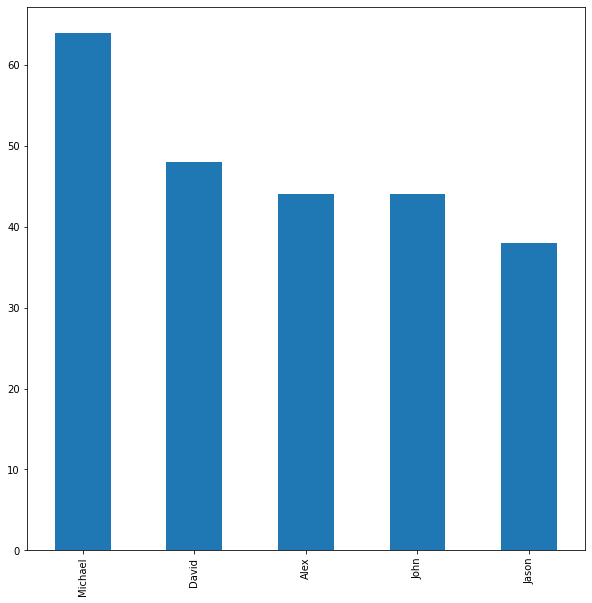

In [ ]:
#Top 5 hosts

plt.figure(figsize=(10,10))
review_50.head(2)
df1 = review_50['host_name'].value_counts()[:5].plot(kind='bar')

In [ ]:
#Average listing for each neighbourhood group

df6 = review_50.groupby(['neighbourhood_group','room_type']).mean()
df6 = df6.drop(['id','calculated_host_listings_count','reviews_per_month'],axis=1)
pd.DataFrame(df6).sort_values('neighbourhood_group')

host_id   latitude  longitude  \
neighbourhood_group room_type                                             
Bronx               Entire home/apt  6.834402e+07  40.845571 -73.874437   
                    Private room     5.771343e+07  40.848007 -73.894449   
                    Shared room      8.610883e+07  40.840340 -73.830070   
Brooklyn            Entire home/apt  3.800972e+07  40.681858 -73.950491   
                    Private room     3.718687e+07  40.684031 -73.948452   
                    Shared room      3.795770e+07  40.668842 -73.941362   
Manhattan           Entire home/apt  3.756310e+07  40.760924 -73.975424   
                    Private room     4.193722e+07  40.776966 -73.968221   
                    Shared room      7.222840e+07  40.772727 -73.972424   
Queens              Entire home/apt  6.497462e+07  40.728087 -73.864378   
                    Private room     7.468608e+07  40.733657 -73.863445   
                    Shared room      9.552170e+07  40.716744 -73.843495   
Staten Island       Entire home/apt  7.416233e+07  40.615301 -74.098382   
                    Private room     5.922092e+07  40.622883 -74.096828   

                                          price  minimum_nights  \
neighbourhood_group room_type                                     
Bronx               Entire home/apt  107.000000        2.212500   
                    Private room      53.132075        2.084906   
                    Shared room       20.000000        1.000000   
Brooklyn            Entire home/apt  158.858362        3.923208   
                    Private room      71.594192        2.731554   
                    Shared room       40.806452        1.967742   
Manhattan           Entire home/apt  218.530612        4.695335   
                    Private room      97.805065        3.119724   
                    Shared room       62.444444        1.916667   
Queens              Entire home/apt  124.053012        2.725301   
                    Private room      61.807356        2.402802   
                    Shared room       43.181818        1.363636   
Staten Island       Entire home/apt  105.652174        3.108696   
                    Private room      54.714286        2.857143   

                                     number_of_reviews  availability_365  
neighbourhood_group room_type                                             
Bronx               Entire home/apt         101.325000        197.387500  
                    Private room            100.566038        177.660377  
                    Shared room             116.000000          5.000000  
Brooklyn            Entire home/apt         109.444824        171.709898  
                    Private room            109.997645        155.525118  
                    Shared room             105.322581        163.258065  
Manhattan           Entire home/apt         106.817784        157.715015  
                    Private room            117.434382        144.940138  
                    Shared room              92.916667        170.402778  
Queens              Entire home/apt         104.643373        184.932530  
                    Private room            116.199650        187.637478  
                    Shared room             122.454545        170.727273  
Staten Island       Entire home/apt          95.065217        197.217391  
                    Private room            105.742857        270.742857